# Tesla Stock Price Prediction

### Find a machine learning algorithm which predicts Tesla share price better.

In [1]:
import numpy as np  # Numpy will help in  large computations in a very short time.
import pandas as pd  # This library helps to load the data frame in a 2D array format.
import seaborn as sns #for visualization
import matplotlib.pyplot as plt  #for visualization

In [2]:
df = pd.read_csv(r'C:\Users\kanis\Downloads\Tesla.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [5]:
df.shape

(2416, 7)

In [6]:
df.size

16912

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.3+ KB


In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [12]:
df = df.drop(['Adj Close'], axis=1)
df


,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,15719300


### EDA(Exploratory Data Analysis)

Text(0, 0.5, 'Price in dollars')

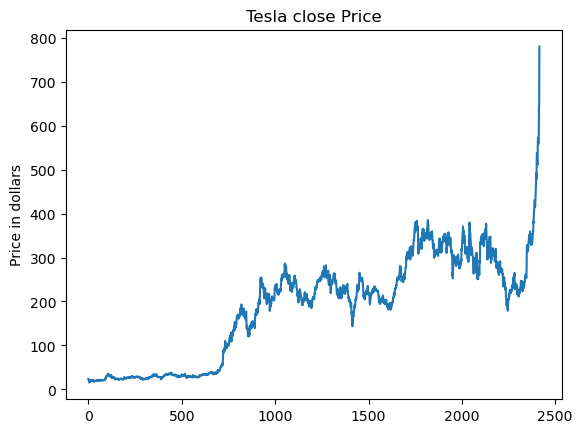

In [13]:
plt.figsize=(10,5)
plt.plot(df['Close'])
plt.title("Tesla close Price")
plt.ylabel("Price in dollars")

<Axes: xlabel='Close'>

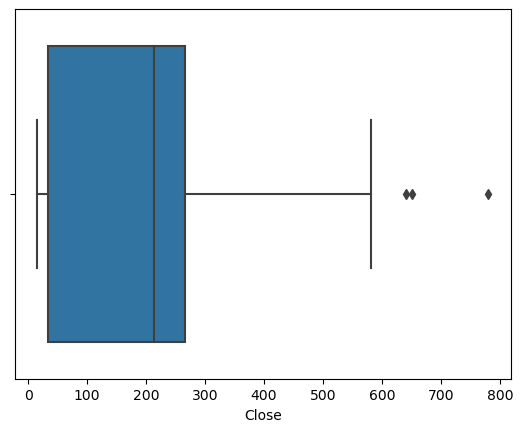

In [14]:
sns.boxplot(x=df['Close'])

<Axes: >

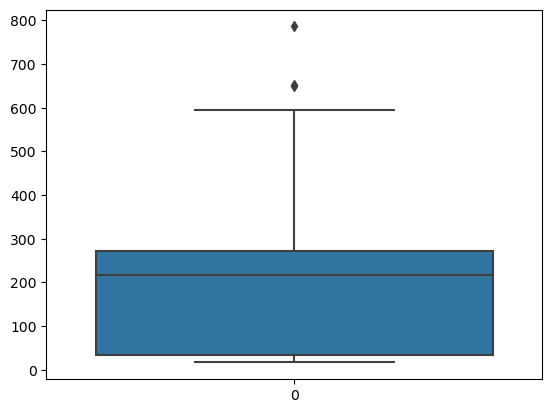

In [15]:
sns.boxplot(df['High'])

<Axes: >

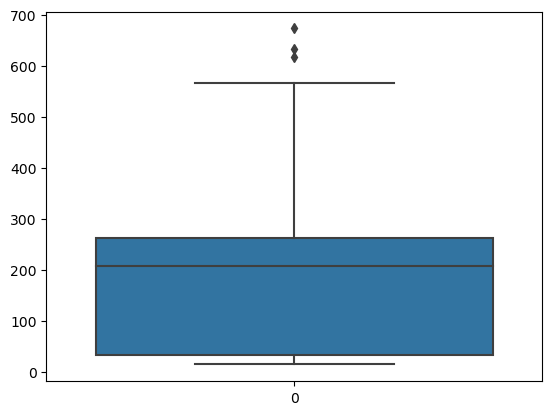

In [16]:
sns.boxplot(df['Low'])

<Axes: >

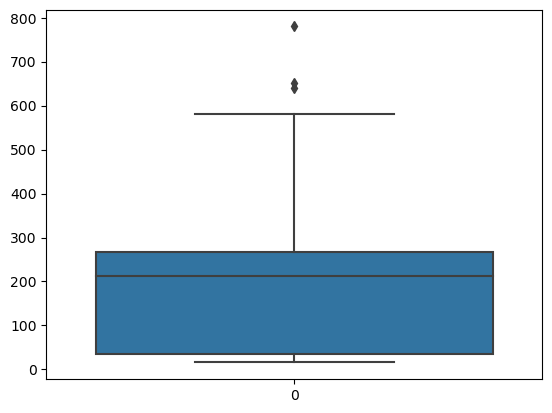

In [17]:
sns.boxplot(df['Close'])

<Axes: >

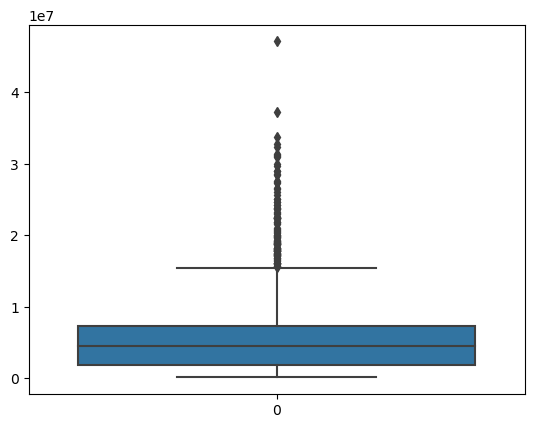

In [18]:
sns.boxplot(df['Volume'])

C:\Users\kanis\AppData\Local\Temp\ipykernel_3628\2746810970.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['Close'])


<Axes: ylabel='Density'>

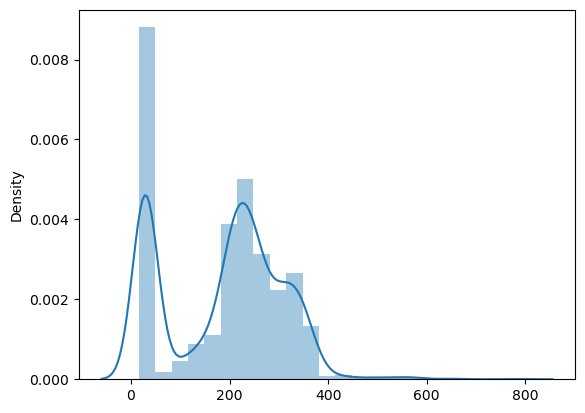

In [19]:
sns.distplot(x=df['Close'])

C:\Users\kanis\AppData\Local\Temp\ipykernel_3628\253520841.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Volume'])


<Axes: xlabel='Volume', ylabel='Density'>

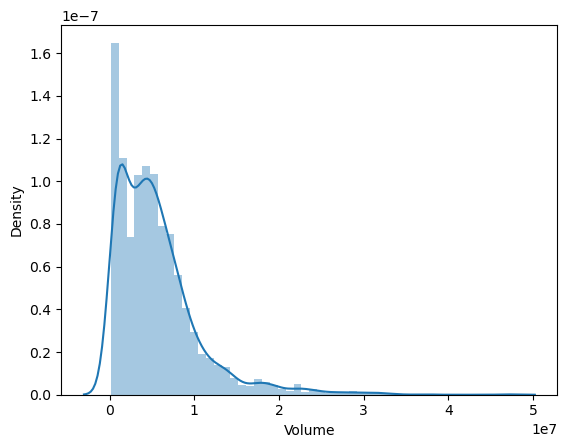

In [20]:
sns.distplot(df['Volume'])

C:\Users\kanis\AppData\Local\Temp\ipykernel_3628\3839789356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Low'])


<Axes: xlabel='Low', ylabel='Density'>

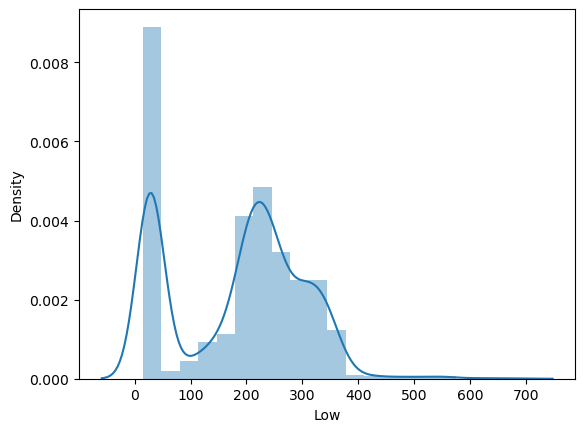

In [21]:
sns.distplot(df['Low'])

C:\Users\kanis\AppData\Local\Temp\ipykernel_3628\2504026347.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['High'])


<Axes: xlabel='High', ylabel='Density'>

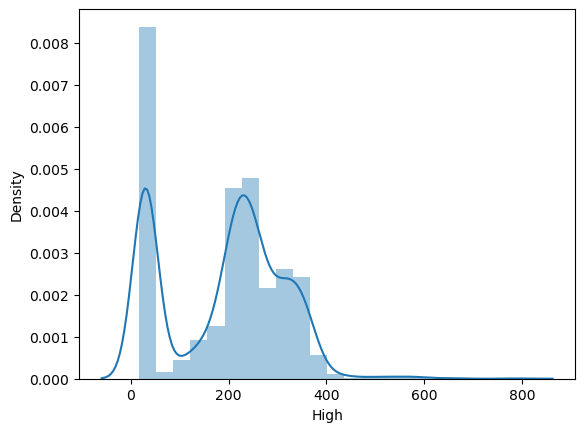

In [22]:
sns.distplot(df['High'])

C:\Users\kanis\AppData\Local\Temp\ipykernel_3628\858187559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Open'])


<Axes: xlabel='Open', ylabel='Density'>

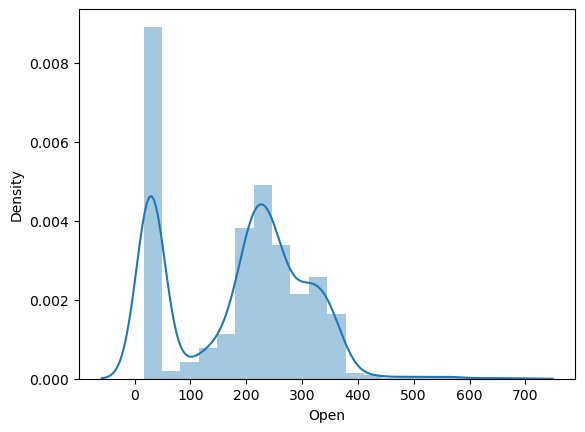

In [23]:
sns.distplot(df['Open'])

In [24]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df.drop('Date', axis=1, inplace=True)  # Drop the original 'Date' column if needed


In [25]:
df

,Open,High,Low,Close,Volume,day,month,year
0,19.000000,25.000000,17.540001,23.889999,18766300,29,6,2010
1,25.790001,30.420000,23.299999,23.830000,17187100,30,6,2010
2,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010
3,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010
4,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010
...,...,...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500,28,1,2020
2412,575.690002,589.799988,567.429993,580.989990,17801500,29,1,2020
2413,632.419983,650.880005,618.000000,640.809998,29005700,30,1,2020
2414,640.000000,653.000000,632.520020,650.570007,15719300,31,1,2020


In [26]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [27]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,5.767062e+06,15.710396,6.173886,2014.816213
1,187.071200,190.232700,183.860262,187.047163,5.180154e+06,15.825000,7.597500,2014.697500


In [28]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0): 


This line creates a new column called 'target,' which is a binary indicator (1 or 0) used for classification. It compares the closing price of the current day with the closing price of the next day. If the closing price of the next day is higher than the current day, the target is set to 1; otherwise, it is set to 0. This column is often used in machine learning models for predicting price movements.



In [29]:
df

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,19.000000,25.000000,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,25.790001,30.420000,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,11788500,28,1,2020,0,1.589966,-18.729981,1
2412,575.690002,589.799988,567.429993,580.989990,17801500,29,1,2020,0,-5.299988,-22.369995,1
2413,632.419983,650.880005,618.000000,640.809998,29005700,30,1,2020,0,-8.390015,-32.880005,1
2414,640.000000,653.000000,632.520020,650.570007,15719300,31,1,2020,0,-10.570007,-20.479980,1


In [30]:
# Looking to the percentage of correlation 
df_numeric = df.select_dtypes(include='number')
df_numeric.corr(method='spearman')*100

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
Open,100.000000,99.901996,99.897615,99.791732,62.095892,0.742916,0.062505,88.002595,1.416145,0.318432,-76.134857,-1.772002
High,99.901996,100.000000,99.884437,99.912351,62.921476,0.710030,0.000293,88.013411,1.453283,-2.377191,-77.128920,-1.955548
Low,99.897615,99.884437,100.000000,99.912490,61.220035,0.876310,0.159641,88.010642,1.535124,-2.542291,-74.952980,-1.817889
Close,99.791732,99.912351,99.912490,100.000000,62.042400,0.795673,0.080487,88.025381,1.338970,-4.940075,-76.054572,-1.947950
Volume,62.095892,62.921476,61.220035,62.042400,100.000000,-4.971249,-4.496760,64.451769,-2.595468,-1.055561,-84.066508,0.193281
day,0.742916,0.710030,0.876310,0.795673,-4.971249,100.000000,-0.055658,0.001483,0.630222,-1.417848,2.915754,0.444200
month,0.062505,0.000293,0.159641,0.080487,-4.496760,-0.055658,100.000000,-9.972655,19.353001,1.912520,3.129513,-0.875939
year,88.002595,88.013411,88.010642,88.025381,64.451769,0.001483,-9.972655,100.000000,-1.903861,-3.184127,-73.208546,0.326276
is_quarter_end,1.416145,1.453283,1.535124,1.338970,-2.595468,0.630222,19.353001,-1.903861,100.000000,1.361353,3.098371,2.649637
open-close,0.318432,-2.377191,-2.542291,-4.940075,-1.055561,-1.417848,1.912520,-3.184127,1.361353,100.000000,-0.082039,3.129483


In [31]:
Q1=df.quantile(0.25).round(3) # taking lower quantile into Q2
Q3 =df.quantile(0.75).round(3) # taking upper quarantile to Q3
IQR = Q3 - Q1 #calculating inter quantile range
print(IQR) #printing quatile range

Open                  232.108
High                  236.030
Low                   228.515
Close                 232.375
Volume            5461875.000
day                    15.000
month                   6.000
year                    5.000
is_quarter_end          1.000
open-close              3.526
low-high                7.375
target                  1.000
dtype: float64


In [32]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] #removing outliers from whole data set.
df.shape

(2021, 12)

In [33]:
x =df.drop(['target'],axis=1) #dropping highly co-related features.
x #new datas set.

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high
2,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000
3,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001
4,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000
5,16.400000,16.629999,14.980000,15.800000,6921700,7,7,2010,0,0.600000,-1.649999
6,16.139999,17.520000,15.570000,17.459999,7711400,8,7,2010,0,-1.320000,-1.950000
...,...,...,...,...,...,...,...,...,...,...,...
2394,424.500000,430.700012,421.709991,430.260010,9532100,2,1,2020,0,-5.760010,-8.990021
2400,481.790009,484.940002,473.700012,478.149994,12959500,10,1,2020,0,3.640015,-11.239990
2405,507.609985,515.669983,503.160004,510.500000,13629100,17,1,2020,0,-2.890015,-12.509979
2409,570.630005,573.859985,554.260010,564.820007,14353600,24,1,2020,0,5.809998,-19.599975


In [34]:
#Dependent variables to y
y = df['target']
y

2       0
3       0
4       0
5       1
6       0
       ..
2394    1
2400    1
2405    1
2409    0
2411    1
Name: target, Length: 2021, dtype: int32

In [35]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3, 
                                                    random_state=0) 

In [36]:
# data normalization with sklearn
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
# fit scaler on training data
x_train = sc.fit_transform(x_train)

# transform testing dataabs
x_test = sc.transform(x_test)

In [37]:
# Importing linear regression library
from sklearn.linear_model import LinearRegression

In [38]:
# loading linearregression model 
reg_model=LinearRegression()

In [39]:
reg_model.fit(x_train,y_train)

LinearRegression()

In [40]:
#Model evaluation for training set
y_predict = reg_model.predict(x_train)

In [41]:
#Importing metrices from sklearn library
from sklearn import metrics
#Metrix gives r2 score to cross verify accuracy of model

In [42]:
reg_model.score(x_train, y_train)

0.0075504315823443635

In [43]:
#cheking the r2_score to y_test,y_predict to predict the accuracy.
r_square=metrics.r2_score(y_train,y_predict)
print('R-square error for decision tree regressor is:',round(100*(r_square),3))

R-square error for decision tree regressor is: 0.755


# Decission tree

In [44]:
#Importing DecisionTreeRegressor from sklearn.tree library.
from sklearn.tree import DecisionTreeRegressor
#Calling DecisionTreeRegressor with max_depth as 3 and calling it to dt.
dt= DecisionTreeRegressor(max_depth=3)


In [45]:
#Fitting x_train,y_train to dt.
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [46]:
# Score of train model
print(dt.score(x_train, y_train))


0.019824628919119625


In [47]:
#Model evaluation for training set
yd_predict = dt.predict(x_train)

In [48]:
#cheking the r2_score to y_test,y_predict to predict the accuracy.
r_square=metrics.r2_score(y_train,yd_predict)
print('R-square error for decision tree regressor is:',round(100*(r_square),3))

R-square error for decision tree regressor is: 1.982


In [49]:
#importing Random forest regressor from sklearn.ensemble and it to rfr with random_state 5 and fitting it to X_train ,y_train
from sklearn.ensemble import RandomForestRegressor
#importing metrices from sklearn library
from sklearn import metrics 
rfr =RandomForestRegressor(random_state=5)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=5)

In [50]:
# Score of train model
print(rfr.score(x_train, y_train))


0.8495856537956649


In [51]:
#by using rfr. predict function x)test and calling it to y_predict to predict a value
y1_pred =rfr.predict(x_train)

In [52]:
#cheking the r2_score to y_test,y_predict to predict the accuracy.
r_square=metrics.r2_score(y_train,y1_pred)
print('R-square error for decision tree regressor is:',round(100*(r_square),3))

R-square error for decision tree regressor is: 84.959
